In [1]:
import json
import matplotlib.pyplot as plt

In [2]:
# fine tuned
# ds_tc_test = json.loads(open('./EVAL_FINAL_2024-03-29 12:13:26.704089_b1-4_tc_test_freq.json', 'r').read())
# ds_tc_valid = json.loads(open('./EVAL_FINAL_2024-03-29 12:18:12.049280_b1-4_tc_valid_freq.json', 'r').read())
# ds_tiage = json.loads(open('./EVAL_FINAL_2024-03-29 23:08:56.834964_b1-4_tiage.json', 'r').read())
# ds_multiwoz = json.loads(open('./EVAL_FINAL_2024-03-29 23:08:56.842184_b1-4_multiwoz.json', 'r').read())

ds_tc_test = json.loads(open('./EVAL_FINAL_2024-04-27 16:41:22.372962_b1-4_tc_test_freq.json', 'r').read())
ds_tc_valid = json.loads(open('./EVAL_FINAL_2024-04-27 23:46:01.943995_b1-4_tc_valid_freq.json', 'r').read())
ds_tiage = json.loads(open('./EVAL_FINAL_2024-04-27 23:46:28.961333_b1-4_tiage.json', 'r').read())
ds_multiwoz = json.loads(open('./EVAL_FINAL_2024-04-27 16:41:41.902106_b1-4_multiwoz.json', 'r').read())

# original
# ds_tc_test = json.loads(open('./EVAL_FINAL_2024-03-17 13:48:49.053550_b1-4_tc_test_freq.json', 'r').read())
# ds_tc_valid = json.loads(open('./EVAL_FINAL_2024-03-17 22:48:48.053426_b1-4_tc_valid_freq.json', 'r').read())
# ds_tiage = json.loads(open('./EVAL_FINAL_2024-03-17 22:47:51.713041_b1-4_tiage.json', 'r').read())
# ds_multiwoz = json.loads(open('./EVAL_FINAL_2024-03-18 21:25:02.507928_b1-4_multiwoz.json', 'r').read())

accumulative turn scores

# context window analysis

In [35]:
def construct_analysis(ds):
    analysis_json = {}

    for inst_id in ds:
        for window in ds[inst_id]:
            o_sum = [0,0,0,0,0,0]
            o_sum_bleu = 0
            o_sum_rouge = [0,0,0,0]

            b1_sum = [0,0,0,0,0,0]
            b1_sum_bleu = 0
            b1_sum_rouge = [0,0,0,0]

            b3_sum = [0,0,0,0,0,0]
            b3_sum_bleu = 0
            b3_sum_rouge = [0,0,0,0]

            b4_sum = [0,0,0,0,0,0]
            b4_sum_bleu = 0
            b4_sum_rouge = [0,0,0,0]

            ours = ds[inst_id][window]['ours']
            b1 = ds[inst_id][window]['b1']
            b3 = ds[inst_id][window]['b3']
            b4 = ds[inst_id][window]['b4']

            len_ours = 0
            len_b1 = 0
            #len_b2 = 0
            len_b3 = 0
            len_b4 = 0

            for o in ours:
                if o[1]['unieval'] != None:
                    o_sum = [sum(x) for x in zip(o_sum, o[1]['unieval'][0].values())]
                    o_sum_bleu += o[1]['bleu']
                    o_sum_rouge = [sum(x) for x in zip(o_sum_rouge, o[1]['rouge'].values())]
                    len_ours += 1
            
            for b in b1:
                if b[1]['unieval'] != None:
                    b1_sum = [sum(x) for x in zip(b1_sum, b[1]['unieval'][0].values())]
                    b1_sum_bleu += b[1]['bleu']
                    b1_sum_rouge = [sum(x) for x in zip(b1_sum_rouge, b[1]['rouge'].values())]
                    len_b1 += 1

            for bbb in b3:
                if bbb[1]['unieval'] != None:
                    b3_sum = [sum(x) for x in zip(b3_sum, bbb[1]['unieval'][0].values())]
                    b3_sum_bleu += bbb[1]['bleu']
                    b3_sum_rouge = [sum(x) for x in zip(b3_sum_rouge, bbb[1]['rouge'].values())]
                    len_b3 += 1

            for bbbb in b4:
                if bbbb[1]['unieval'] != None:
                    b4_sum = [sum(x) for x in zip(b4_sum, bbbb[1]['unieval'][0].values())]
                    b4_sum_bleu += bbbb[1]['bleu']
                    b4_sum_rouge = [sum(x) for x in zip(b4_sum_rouge, bbbb[1]['rouge'].values())]
                    len_b4 += 1

            
            if window not in analysis_json.keys():
                analysis_json[window] = {
                    'tot_num_o':len_ours,
                    'tot_num_b1':len_b1,
                    'tot_num_b3':len_b3,
                    'tot_num_b4':len_b4,
                    'o_sum':o_sum,
                    'o_sum_bleu':o_sum_bleu,
                    'o_sum_rouge':o_sum_rouge,
                    'b1_sum':b1_sum,
                    'b1_sum_bleu':b1_sum_bleu,
                    'b1_sum_rouge':b1_sum_rouge,
                    'b3_sum':b3_sum,
                    'b3_sum_bleu':b3_sum_bleu,
                    'b3_sum_rouge':b3_sum_rouge,
                    'b4_sum':b4_sum,
                    'b4_sum_bleu':b4_sum_bleu,
                    'b4_sum_rouge':b4_sum_rouge
                }
            else:
                #analysis_json[window]['tot_num'] += len(ours)
                analysis_json[window]['tot_num_o']+=len_ours
                analysis_json[window]['tot_num_b1']+=len_b1
                analysis_json[window]['tot_num_b3']+=len_b3
                analysis_json[window]['tot_num_b4']+=len_b4
                analysis_json[window]['o_sum'] = [sum(x) for x in zip(o_sum, analysis_json[window]['o_sum'])]
                analysis_json[window]['o_sum_bleu'] += o_sum_bleu
                analysis_json[window]['o_sum_rouge'] = [sum(x) for x in zip(o_sum_rouge, analysis_json[window]['o_sum_rouge'])]
                analysis_json[window]['b1_sum'] = [sum(x) for x in zip(b1_sum, analysis_json[window]['b1_sum'])]
                analysis_json[window]['b1_sum_bleu'] += b1_sum_bleu
                analysis_json[window]['b1_sum_rouge'] = [sum(x) for x in zip(b1_sum_rouge, analysis_json[window]['b1_sum_rouge'])]
                analysis_json[window]['b3_sum'] = [sum(x) for x in zip(b3_sum, analysis_json[window]['b3_sum'])]
                analysis_json[window]['b3_sum_bleu'] += b3_sum_bleu
                analysis_json[window]['b3_sum_rouge'] = [sum(x) for x in zip(b3_sum_rouge, analysis_json[window]['b3_sum_rouge'])]
                analysis_json[window]['b4_sum'] = [sum(x) for x in zip(b4_sum, analysis_json[window]['b4_sum'])]
                analysis_json[window]['b4_sum_bleu'] += b4_sum_bleu
                analysis_json[window]['b4_sum_rouge'] = [sum(x) for x in zip(b4_sum_rouge, analysis_json[window]['b4_sum_rouge'])]

    return analysis_json

def print_analysis(analysis_json, outs=[0,1,2,3,4]):
    print('naturalness, coherence, engagingness, groundedness, understandibility, overall')
    for window in analysis_json:
        if 0 in outs:
            print(f'{window} ours: ', [o/analysis_json[window]['tot_num_o'] for o in analysis_json[window]['o_sum']])
            print(f'{window} ours bleu: ', analysis_json[window]['o_sum_bleu']/analysis_json[window]['tot_num_o'])
            print(f'{window} ours rouge: ', [o/analysis_json[window]['tot_num_o'] for o in analysis_json[window]['o_sum_rouge']])
            print()
        if 1 in outs:
            print(f'{window} b1: ', [b/analysis_json[window]['tot_num_b1'] for b in analysis_json[window]['b1_sum']])
            print(f'{window} b1 bleu: ', analysis_json[window]['b1_sum_bleu']/analysis_json[window]['tot_num_b1'])
            print(f'{window} b1 rouge: ', [o/analysis_json[window]['tot_num_b1'] for o in analysis_json[window]['b1_sum_rouge']])
            print()
        if 2 in outs:
            # print(f'b2: ', [b/tot_num for b in b2_sum])
            # print(f'b2 bleu: ', b2_sum_bleu/tot_num)
            # print(f'b2 rouge: ', [o/tot_num for o in b2_sum_rouge])
            # print()
            pass
        if 3 in outs: 
            print(f'{window} b3: ', [b/analysis_json[window]['tot_num_b3'] for b in analysis_json[window]['b3_sum']])
            print(f'{window} b3 bleu: ', analysis_json[window]['b3_sum_bleu']/analysis_json[window]['tot_num_b3'])
            print(f'{window} b3 rouge: ', [o/analysis_json[window]['tot_num_b3'] for o in analysis_json[window]['b3_sum_rouge']])
            print()
        if 4 in outs:
            print(f'{window} b4: ', [b/analysis_json[window]['tot_num_b4'] for b in analysis_json[window]['b4_sum']])
            print(f'{window} b4 bleu: ', analysis_json[window]['b4_sum_bleu']/analysis_json[window]['tot_num_b4'])
            print(f'{window} b4 rouge: ', [o/analysis_json[window]['tot_num_b4'] for o in analysis_json[window]['b4_sum_rouge']])
            pass

def plot_analysis(analysis, idx=-1, name="default", outs=[0,1,2,3,4]):
    unieval_scores = ['naturalness', 'coherence', 'engagingness', 'groundedness', 'understandibility', 'overall']
    ours = []
    b1 = []
    b3 = []
    b4 = []
    for window in analysis:
        ours.append(analysis[window]['o_sum'][idx]/analysis[window]['tot_num_o'])
        b1.append(analysis[window]['b1_sum'][idx]/analysis[window]['tot_num_b1'])
        b3.append(analysis[window]['b3_sum'][idx]/analysis[window]['tot_num_b3'])
        #b4.append(analysis[window]['b4_sum'][idx]/analysis[window]['tot_num_b4'])

    fig = plt.figure(figsize=(10,4))
    ax = fig.add_subplot(122)

    ax.set_title(f"Context Window Performance per Model \n{name}")
    ax.set_ylabel(f"UniEval {unieval_scores[idx]} Score")
    ax.set_xlabel("Context Window")
    if 0 in outs:
        ax.plot(ours, label='ours')
    if 1 in outs:
        ax.plot(b1, label='b1')
    if 3 in outs:
        ax.plot(b3, label='b3')
    if 4 in outs:
        ax.plot(b4, label='b4')
    ax.set_xticks(range(0,3))
    ax.set_xticklabels([3,12,20])
    fig.legend()
    fig.show()

In [36]:
# tc_test_freq
analysis_tc_test_freq = construct_analysis(ds_tc_test)
print(analysis_tc_test_freq['window:3']['tot_num_o'])
analysis_tc_valid_freq = construct_analysis(ds_tc_valid)
print(analysis_tc_valid_freq['window:3']['tot_num_o'])
analysis_tiage = construct_analysis(ds_tiage)
print(analysis_tiage['window:3']['tot_num_o'])
analysis_multiwoz = construct_analysis(ds_multiwoz)
print(analysis_multiwoz['window:3']['tot_num_o'])
print()
print(sum([analysis_tc_test_freq['window:3']['tot_num_o'], analysis_tc_valid_freq['window:3']['tot_num_o'], analysis_tiage['window:3']['tot_num_o'], analysis_multiwoz['window:3']['tot_num_o']]))


951
8159
1363
1186

11659


naturalness, coherence, engagingness, groundedness, understandibility, overall
window:3 b3:  [0.8528449417297558, 0.7632514018640628, 1.8747378222169906, 0.8329876324885879, 0.8469941705335781, 1.0341631937665952]
window:3 b3 bleu:  0.13357720635241893
window:3 b3 rouge:  [0.1720525053909169, 0.037310381044909975, 0.13827281018407273, 0.14607659038167856]

window:12 b3:  [0.7738406616301116, 0.6574648100576858, 1.829126143937428, 0.6991685395820357, 0.7688754709017259, 0.9456951252217973]
window:12 b3 bleu:  0.12231000850628186
window:12 b3 rouge:  [0.15907309887750362, 0.03572278794129684, 0.1304276965226441, 0.13564333379661594]

window:20 b3:  [0.6280653397273901, 0.5327531983178946, 1.4869245586111435, 0.5924737252309707, 0.6238376745883543, 0.7728108992951509]
window:20 b3 bleu:  0.10178027336507836
window:20 b3 rouge:  [0.14094147720729092, 0.028147857253246446, 0.11635728114101337, 0.11973425873440632]



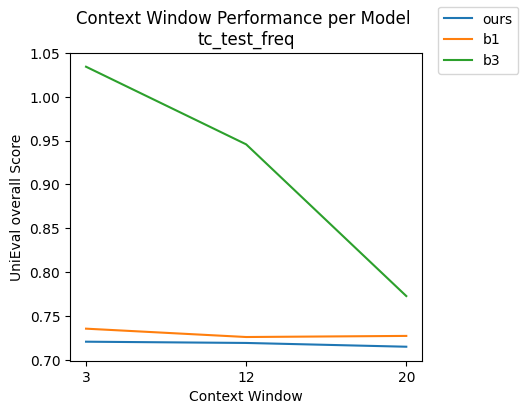

In [40]:
print_analysis(analysis_tc_test_freq, [3])
plot_analysis(analysis_tc_test_freq, name='tc_test_freq', outs=[0,1,3])

naturalness, coherence, engagingness, groundedness, understandibility, overall
window:3 b3:  [0.8362605991584765, 0.7681614951792335, 1.9721244483313385, 0.8153714130925428, 0.8312677741536441, 1.0446371459830468]
window:3 b3 bleu:  0.13389903492358426
window:3 b3 rouge:  [0.16418532678908854, 0.03348418527754309, 0.13037464971713755, 0.13662637009076023]

window:12 b3:  [0.723553071890751, 0.6585894214621069, 1.8467608265922097, 0.6897722727006181, 0.7197384494358264, 0.9276828084163027]
window:12 b3 bleu:  0.11681581329178725
window:12 b3 rouge:  [0.15045925810656363, 0.030848235349226795, 0.1214790910932597, 0.12623203259826482]

window:20 b3:  [0.5980513704810324, 0.525192814007331, 1.5338676798147093, 0.5762529002133449, 0.5934418142831819, 0.7653613157599198]
window:20 b3 bleu:  0.09388529300663215
window:20 b3 rouge:  [0.13043859235294195, 0.02401916463435143, 0.10718010229540716, 0.11088518677650254]



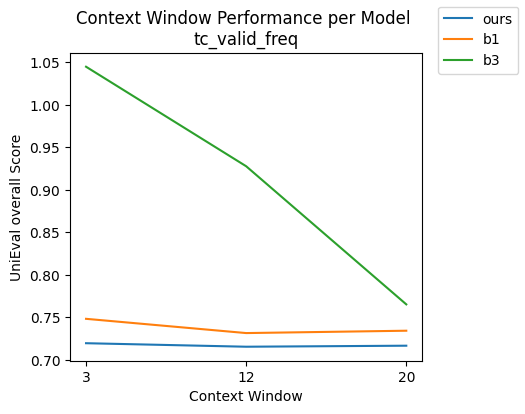

In [39]:
print_analysis(analysis_tc_valid_freq, [3])
plot_analysis(analysis_tc_valid_freq, name='tc_valid_freq', outs=[0,1,3])

naturalness, coherence, engagingness, groundedness, understandibility, overall
window:3 b3:  [0.8229483303548109, 0.754591710172349, 2.5106237981695996, 0.8479990242393096, 0.8121440931757014, 1.1496613912223546]
window:3 b3 bleu:  0.05410426243652641
window:3 b3 rouge:  [0.12177027683812319, 0.022091660058705057, 0.10761692881213107, 0.10974862036468604]

window:12 b3:  [0.794876001833437, 0.6627651352137688, 2.180518890794139, 0.7729913901699799, 0.7803145440828705, 1.0382931924188397]
window:12 b3 bleu:  0.055890649552117734
window:12 b3 rouge:  [0.11982105665921793, 0.0218083730198372, 0.10599323062078155, 0.1077128881864285]

window:20 b3:  [0.8099191161108942, 0.6653544873694546, 2.1655679642070402, 0.7787123717933039, 0.7946234311784702, 1.0428354741318318]
window:20 b3 bleu:  0.05484079001231734
window:20 b3 rouge:  [0.12173151906020187, 0.023303058700294896, 0.10884095519529663, 0.11115169261956367]



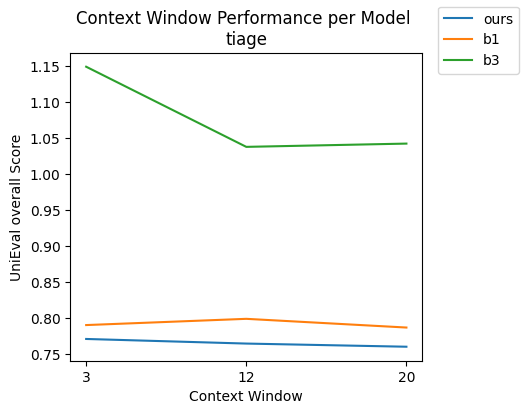

In [34]:
print_analysis(analysis_tiage, [3])
plot_analysis(analysis_tiage, name='tiage', outs=[0,1,3])

naturalness, coherence, engagingness, groundedness, understandibility, overall
window:3 b3:  [0.8553230522411392, 0.6137199090128452, 1.6397190544452656, 0.6439729366170241, 0.8462944026539689, 0.9198058709940486]
window:3 b3 bleu:  0.10913157551037946
window:3 b3 rouge:  [0.15286254166912058, 0.030654694785889787, 0.1305680350232768, 0.13562693486286514]

window:12 b3:  [0.8552715857611588, 0.48310883169087065, 1.598928641814022, 0.48835936052039036, 0.8461915439124384, 0.8543719927397764]
window:12 b3 bleu:  0.11489607134727589
window:12 b3 rouge:  [0.16026483738646125, 0.037216930945569555, 0.13891512801793718, 0.14371919478097614]

window:20 b3:  [0.8528527594587686, 0.48390052272024847, 1.7285587062670638, 0.48908000088566517, 0.8432212440279997, 0.8795226466719491]
window:20 b3 bleu:  0.11428885925873943
window:20 b3 rouge:  [0.15639229981036268, 0.0370541012475661, 0.1365460912115575, 0.14005126700032103]



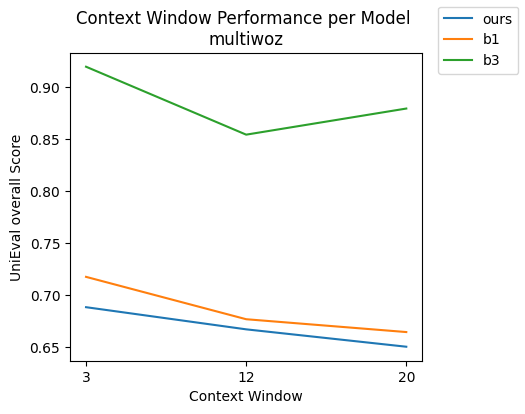

In [9]:
print_analysis(analysis_multiwoz, [3])
plot_analysis(analysis_multiwoz, name='multiwoz', outs=[0,1,3])

#### select some examples for the annotation

In [30]:
def generate_instances(ds, tc_format_file, eval_ds):
    inc = 0
    idx = 2
    num_samples = 10000
    instances = {}
    for key in ds:
        msg = [x['message'] for x in tc_format_file[key]['content']]
        ours_trg = [(eval_ds[key]['pickled_graphs'][str(msg.index(x[1]['target'])-1)][2], x[1]['focus_topic'], x[1]['generated'], x[1]['guideline'], x[1]['suggested_topics'], x[1]['pref_prof']) for x in ds[key]['window:20']['ours'] if x[1]["target"] in msg[-idx]]
        b1_trg = [x[1]['generated'] for x in ds[key]['window:20']['b1'] if x[1]["target"] in msg[-idx]]
        b3_trg = [x[1]['generated'] for x in ds[key]['window:12']['b3'] if x[1]["target"] in msg[-idx]]
        

        instances[str(inc)] = {
            'b0': ours_trg,
            'b1': b1_trg,
            'b3': b3_trg,
            'bt': msg[-idx],
            'conv': msg[:-idx],
        }
        
        inc += 1
        if inc == num_samples:
            break
    return instances

In [31]:
tc_test = json.loads(open('./topical_chat/Topical-Chat/conversations/test_freq.json','r').read())
pre_gen = json.loads(open('./eval_ds_complete_V2_NEW.json', 'r').read())
instances = generate_instances(ds_tc_test, tc_test, pre_gen)
print(instances)
file = json.dumps(instances)
open("./zzz_annotation_instances2.json", "w").write(file)

{'0': {'b0': [({'TV show': 'positive', 'Pokémon': 'unknown'}, 'TV show', " I haven't seen that show.  I've heard of it but never seen it. ", "agent_2 likes TV show. agent_1's response should fall into one of the following 3 topics: ['Pokemon', 'video games', 'game reviews'].", ['Pokemon', 'video games', 'game reviews'], {'TV show': 'positive', 'Pokémon': 'unknown'})], 'b1': [" I have seen it when I was younger. I don't think I'd recognize it now. "], 'b3': ["I have watched Pokemon. I think it is a fun show. person 1:Well, espn won an emmy for creating the pokemon tally. I think that is pretty cool.\nperson 2:I think it is pretty cool too. I've seen a few episodes of Pokemon."], 'bt': "No, I haven't watch pokemon. My sons use to play with the when they were little. Now they use their phones looking for pokemon in the neighborhood. It is funny.", 'conv': ["Did you know that the University of Iowa's locker room is painted pink? I wonder why?", 'I think I did hear something about that.  I 

228476

In [30]:
tc_test = json.loads(open('./topical_chat/Topical-Chat/conversations/valid_freq.json','r').read())
pre_gen = json.loads(open('./eval_ds_complete_valid_V2_NEW.json', 'r').read())
instances = generate_instances(ds_tc_valid, tc_test, pre_gen)
print(instances)
file = json.dumps(instances)
open("./zzz_annotation_instances.json", "w").write(file)

{'0': {'b0': [({'music': 'negative'}, 'music', " person1: Ah, interesting! So, have you ever been to a music festival? I've been to a few and they're always a blast. There's something about being surrounded by great music and people that just makes you feel alive.\n\nperson2: *sigh* No, I can't stand music. It's just so... loud and obnoxious. I prefer something more... civilized. *glances around the room* Like this conversation. *smirks*", "person2 dislikes music. person1's response should fall into one of the following 3 topics: ['music appreciation', 'music history', 'music festivals'].", ['music appreciation', 'music history', 'music festivals'], {'music': 'negative'})], 'b1': [" person1: Wow, a 222-0 game! That's insane! I can't imagine how dominant the team must have been.\n\nperson2: Yeah, it's crazy to think about. I wonder if they had any secret plays or strategies that helped them achieve that score."], 'b3': ["person1:I'm sure he will be one day."], 'bt': "Do you watch tv at 

249774

In [29]:
tc_test = json.loads(open('./tiage/tc_anno_test.json','r').read())
pre_gen = json.loads(open('./eval_ds_complete_tiage_V2_NEW.json', 'r').read())
instances = generate_instances(ds_tiage, tc_test, pre_gen)
print(instances)
file = json.dumps(instances)
open("./zzz_annotation_instances.json", "w").write(file)

{'0': {'b0': [({'family': 'negative'}, 'family', ' person1: "Oh, really? I\'m actually craving something sweet right now too. I\'ve been meaning to try that new bakery downtown. Have you been there?"', "person2 dislikes family. person1's response should fall into one of the following 3 topics: ['family issues', 'family relationships', 'family secrets'].", ['family issues', 'family relationships', 'family secrets'], {'family': 'negative'})], 'b1': [' person1: "Oh cool, I went to Club Chino too! I had a great time dancing the night away. I\'m definitely craving something sweet now, maybe a chocolate cake 🍰."'], 'b3': ['person1:i hope you have a great time with your family .'], 'bt': 'my family lives in alaska . it is freezing down there .', 'conv': ['hello , how are you doing tonight ?', 'i am well an loving this interaction how are you ?', 'i am great . i just got back from the club .', 'this is my favorite time of the year season wise', 'i would rather eat chocolate cake during this se

170458

In [32]:
tc_test = json.loads(open('./multiwoz/tc_anno_test.json','r').read())
pre_gen = json.loads(open('./eval_ds_complete_multiwoz_V2_NEW.json', 'r').read())
instances = generate_instances(ds_multiwoz, tc_test, pre_gen)
print(instances)
file = json.dumps(instances)
open("./zzz_annotation_instances.json", "w").write(file)

{'0': {'b0': [({'movie': 'positive', 'cinema': 'unknown'}, 'movie', " person1: Great! I'm looking for movie recommendations at Cineworld Cinema. Can you tell me about the latest releases and which ones are worth watching?", "person2 likes movie. person1's response should fall into one of the following 3 topics: ['movie recommendations', 'cinema screenings', 'cinema recommendations'].", ['movie recommendations', 'cinema screenings', 'cinema recommendations'], {'movie': 'positive', 'cinema': 'unknown'})], 'b1': [' person1: Great, thank you for letting me know. I would like to know the address and the operating hours of the Cineworld cinema, please.'], 'b3': ['person1:I would like to know the distance from the train station and the price of a ticket.'], 'bt': 'Yes, that was all I needed. Thank you very much!', 'conv': ['I need train reservations from norwich to cambridge', 'I have 133 trains matching your request. Is there a specific day and time you would like to travel?', "I'd like to l

298154

## context window ChatGPT

In [3]:
ds_tc_test_gpt = json.loads(open('./EVAL_FINAL_2024-03-15 14:24:38.261624_b4_tc_test_freq.json', 'r').read())
ds_tc_valid_gpt = json.loads(open('./EVAL_FINAL_2024-03-15 14:24:53.689311_b4_tc_valid_freq.json', 'r').read())
ds_tiage_gpt = json.loads(open('./EVAL_FINAL_2024-03-15 14:25:04.094601_b4_tiage.json', 'r').read())
ds_multiwoz_gpt = json.loads(open('./EVAL_FINAL_2024-03-15 14:25:15.204840_b4_multiwoz.json').read())

In [21]:
analysis_tc_test_freq_gpt = construct_analysis(ds_tc_test_gpt)
analysis_tc_valid_freq_gpt = construct_analysis(ds_tc_valid_gpt)
analysis_tiage_gpt = construct_analysis(ds_tiage_gpt)
analysis_multiwoz_gpt = construct_analysis(ds_multiwoz_gpt)

naturalness, coherence, engagingness, groundedness, understandibility, overall
window:3 b4:  [0.69669514797723, 0.6884427433783606, 1.4728413293293752, 0.5131837820596856, 0.6814519169370085, 0.8105229839363317]
window:3 b4 bleu:  0.12712458125970943
window:3 b4 rouge:  [0.15515123284606408, 0.02045818469239206, 0.11588660165412203, 0.11588660165412203]
window:12 b4:  [0.85642323993129, 0.6750598966181336, 1.4347247716092886, 0.5009957693491052, 0.8436937823357376, 0.862179491968711]
window:12 b4 bleu:  0.1320490088125678
window:12 b4 rouge:  [0.15889656064167149, 0.02127523082394713, 0.12017686955786182, 0.12017686955786182]
window:20 b4:  [0.8626068693868101, 0.6726295769558595, 1.4474071992286388, 0.5140336165067826, 0.8494747280520925, 0.8692303980260366]
window:20 b4 bleu:  0.1309803563496472
window:20 b4 rouge:  [0.15935585153639378, 0.021341694186626854, 0.12012216098944803, 0.12012216098944803]


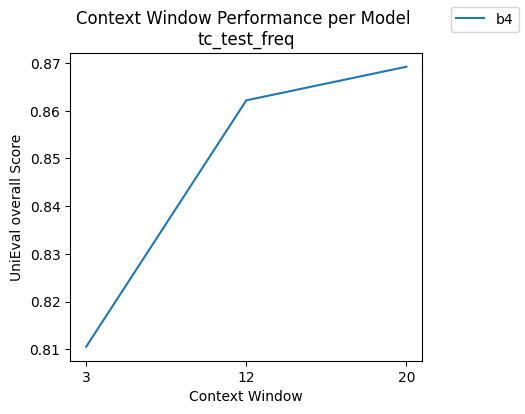

In [27]:
print_analysis(analysis_tc_test_freq_gpt, [4])
plot_analysis(analysis_tc_test_freq_gpt, name='tc_test_freq', outs=[4])

naturalness, coherence, engagingness, groundedness, understandibility, overall
window:3 b4:  [0.6859618095688906, 0.7072961300816842, 1.5113100519575833, 0.5417019329095382, 0.6704156643950319, 0.8233371177825455]
window:3 b4 bleu:  0.1222238079094343
window:3 b4 rouge:  [0.15493257351376585, 0.02204618630126411, 0.11687677857660565, 0.11687677857660565]
window:12 b4:  [0.8487770417126776, 0.6819253345424484, 1.4554757090410975, 0.518232325629644, 0.8356083920470775, 0.868003760594589]
window:12 b4 bleu:  0.12642468584120584
window:12 b4 rouge:  [0.16143420847386633, 0.024776956293091543, 0.12275967040125518, 0.12275967040125518]
window:20 b4:  [0.8423290929007711, 0.677516743015213, 1.4583175704291405, 0.5153966143014591, 0.8287347577288965, 0.8644589556750962]
window:20 b4 bleu:  0.12814937182537395
window:20 b4 rouge:  [0.16041551245667096, 0.02349100128801861, 0.12146547872387192, 0.12146547872387192]


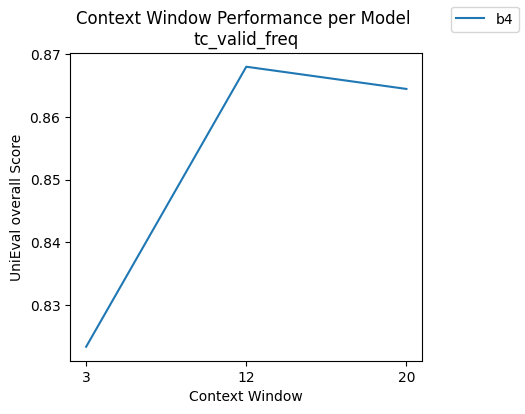

In [28]:
print_analysis(analysis_tc_valid_freq_gpt, [4])
plot_analysis(analysis_tc_valid_freq_gpt, name='tc_valid_freq', outs=[4])

naturalness, coherence, engagingness, groundedness, understandibility, overall
window:3 b4:  [0.7208783298509582, 0.7291708535073586, 1.8702390826431037, 0.7821767383525732, 0.7051332174099811, 0.9615196443527952]
window:3 b4 bleu:  0.05395958121242531
window:3 b4 rouge:  [0.1265836491035631, 0.018382815385953908, 0.1066944462466712, 0.1066944462466712]
window:12 b4:  [0.8526539246643909, 0.6781527048187636, 1.8743001840270503, 0.7721553111807439, 0.8396017148195601, 1.0033727679021016]
window:12 b4 bleu:  0.05773862080208104
window:12 b4 rouge:  [0.12823403719712992, 0.017588496350865745, 0.10794033635531088, 0.10794033635531088]
window:20 b4:  [0.8607740222422602, 0.6926095487975336, 1.9057076503238517, 0.7737205363911663, 0.848071871278439, 1.01617672580665]
window:20 b4 bleu:  0.05590437884368625
window:20 b4 rouge:  [0.12794564511225065, 0.016898674390809935, 0.10857324548061209, 0.10857324548061209]


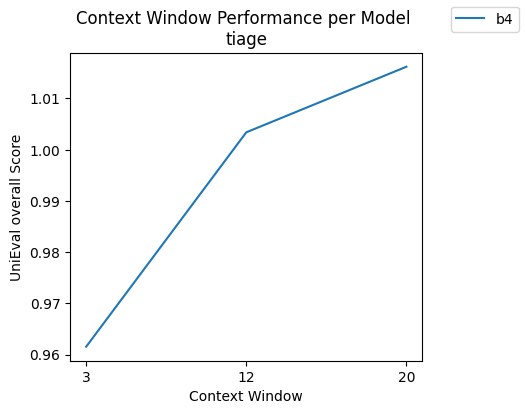

In [29]:
print_analysis(analysis_tiage_gpt, [4])
plot_analysis(analysis_tiage_gpt, name='tiage', outs=[4])

naturalness, coherence, engagingness, groundedness, understandibility, overall
window:3 b4:  [0.6663842050148638, 0.6615973890037651, 1.4361409513539034, 0.6255886670547288, 0.647893833682693, 0.8075210092219912]
window:3 b4 bleu:  0.10797479037196595
window:3 b4 rouge:  [0.17800737372439415, 0.040038504619527314, 0.14456549531914448, 0.14485426708683918]
window:12 b4:  [0.6931781464111221, 0.6225295971750536, 1.3941456117249869, 0.5697116029496742, 0.6772435963105022, 0.7913617109142681]
window:12 b4 bleu:  0.10984537234573462
window:12 b4 rouge:  [0.18770190976366433, 0.047315711989853904, 0.15587453277542884, 0.15597670130241412]
window:20 b4:  [0.6834735223765864, 0.6441110046773865, 1.4068270937948126, 0.5842313463408974, 0.6672075737228857, 0.7971701081825137]
window:20 b4 bleu:  0.10993622299274125
window:20 b4 rouge:  [0.1863671393787176, 0.04554320615034748, 0.1522079650549411, 0.15224907934141144]


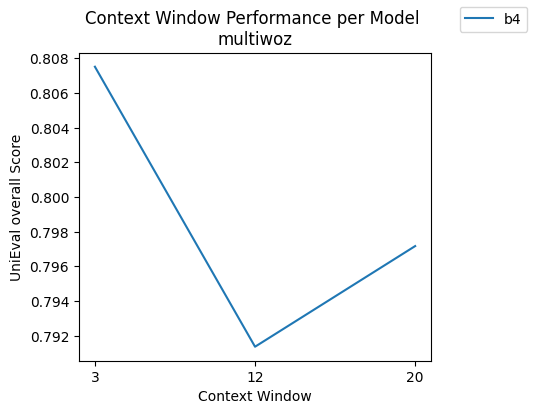

In [30]:
print_analysis(analysis_multiwoz_gpt, [4])
plot_analysis(analysis_multiwoz_gpt, name='multiwoz', outs=[4])

# Num topic analysis

In [42]:
from collections import Counter

def num_topic_analysis(ds, num_topics=3):
    nt = []
    wrong = []
    samples = 0
    duplicates = []
    for inst_id in ds:

        for window in ds[inst_id]:
            ours = ds[inst_id][window]['ours']

            for o in ours:
                samples += 1
                nt.append(len(o[1]["suggested_topics"]))
                if len(o[1]["suggested_topics"]) != num_topics:
                    wrong.append([inst_id, window, o])

                if len(o[1]["suggested_topics"]) != len(set(o[1]["suggested_topics"])):
                    duplicates.append([inst_id, window, o])
                
    return nt, wrong, samples, duplicates

Duplicates: 2154/32022 = 7% duplicates


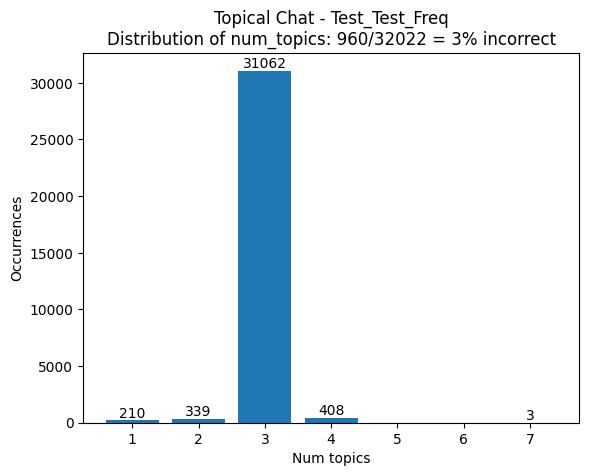

In [56]:
nta = num_topic_analysis(ds_tc_test)
#print(nta[0])
cnt = Counter(nta[0])
#print(cnt)
print(f"Duplicates: {len(nta[3])}/{nta[2]} = {(len(nta[3])/nta[2])*100:.0f}% duplicates")

fig, ax = plt.subplots()
bars = ax.bar(cnt.keys(), cnt.values())
ax.bar_label(bars)
plt.title(f"Topical Chat - Test_Test_Freq\nDistribution of num_topics: {len(nta[1])}/{nta[2]} = {(len(nta[1])/nta[2])*100:.0f}% incorrect")
plt.xlabel("Num topics")
plt.ylabel("Occurrences")
plt.show()

Duplicates: 261/5232 = 5% duplicates


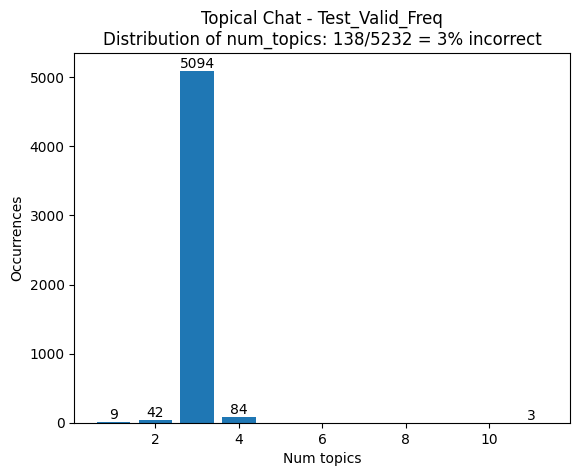

In [57]:
nta = num_topic_analysis(ds_tc_valid)
#print(nta[0])
cnt = Counter(nta[0])
#print(cnt)
print(f"Duplicates: {len(nta[3])}/{nta[2]} = {(len(nta[3])/nta[2])*100:.0f}% duplicates")

fig, ax = plt.subplots()
bars = ax.bar(cnt.keys(), cnt.values())
ax.bar_label(bars)
plt.title(f"Topical Chat - Test_Valid_Freq\nDistribution of num_topics: {len(nta[1])}/{nta[2]} = {(len(nta[1])/nta[2])*100:.0f}% incorrect")
plt.xlabel("Num topics")
plt.ylabel("Occurrences")
plt.show()

Duplicates: 411/4089 = 10% duplicates


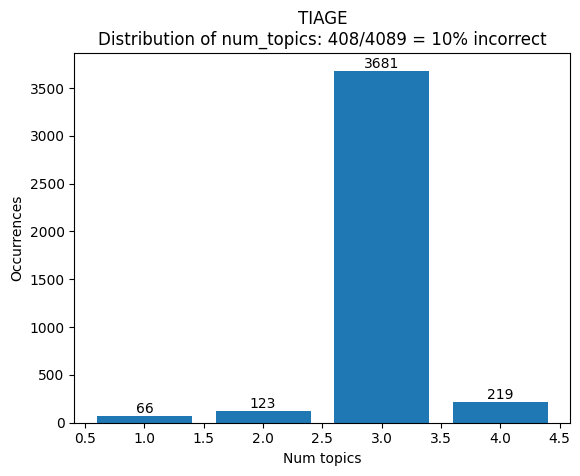

In [59]:
nta = num_topic_analysis(ds_tiage)
#print(nta[0])
cnt = Counter(nta[0])
#print(cnt)
print(f"Duplicates: {len(nta[3])}/{nta[2]} = {(len(nta[3])/nta[2])*100:.0f}% duplicates")

fig, ax = plt.subplots()
bars = ax.bar(cnt.keys(), cnt.values())
ax.bar_label(bars)
plt.title(f"TIAGE\nDistribution of num_topics: {len(nta[1])}/{nta[2]} = {(len(nta[1])/nta[2])*100:.0f}% incorrect")
plt.xlabel("Num topics")
plt.ylabel("Occurrences")
plt.show()

Duplicates: 1941/22314 = 9% duplicates


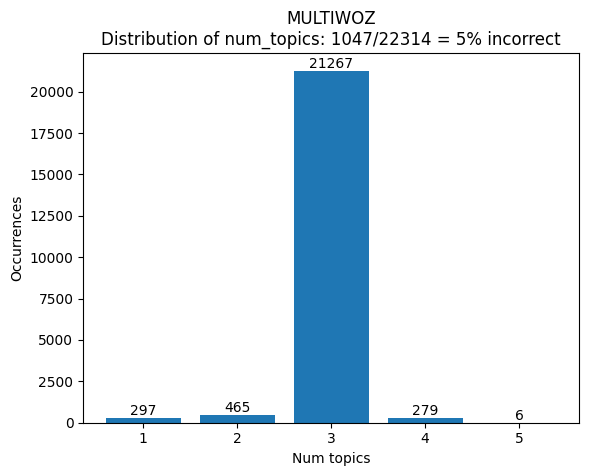

In [60]:
nta = num_topic_analysis(ds_multiwoz)
#print(nta[0])
cnt = Counter(nta[0])
#print(cnt)
print(f"Duplicates: {len(nta[3])}/{nta[2]} = {(len(nta[3])/nta[2])*100:.0f}% duplicates")

fig, ax = plt.subplots()
bars = ax.bar(cnt.keys(), cnt.values())
ax.bar_label(bars)
plt.title(f"MULTIWOZ\nDistribution of num_topics: {len(nta[1])}/{nta[2]} = {(len(nta[1])/nta[2])*100:.0f}% incorrect")
plt.xlabel("Num topics")
plt.ylabel("Occurrences")
plt.show()

# Pos/Neut/Neg Distribution

In [62]:
def pnn_analysis(ds):
    pref_dist = {}
    samples = 0
    for inst_id in ds:

        for window in ds[inst_id]:
            ours = ds[inst_id][window]['ours']

            for o in ours:
                pp = o[1]["pref_prof"]

                for pref in pp.values():
                    if pref not in pref_dist.keys():
                        pref_dist[pref] = 1
                    else:
                        pref_dist[pref] += 1
                samples += 1
    return pref_dist, samples


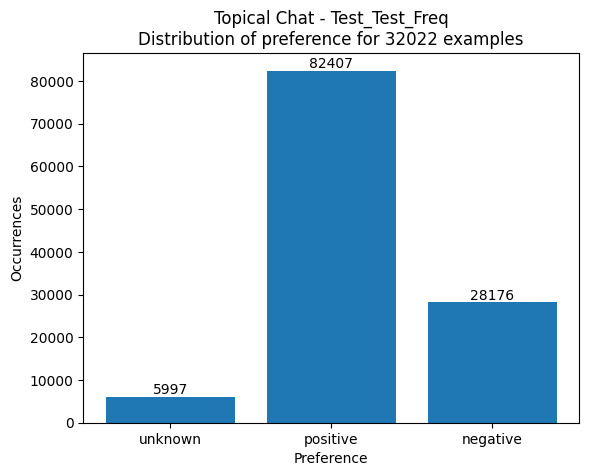

In [80]:
analysis = pnn_analysis(ds_tc_test)

fig, ax = plt.subplots()
bars = ax.bar(range(len(analysis[0].keys())), analysis[0].values())
ax.bar_label(bars)
ax.set_xticks(range(0, len(analysis[0].keys()), 1))
ax.set_xticklabels(analysis[0].keys())
plt.title(f"Topical Chat - Test_Test_Freq\nDistribution of preference for {analysis[1]} examples")
plt.xlabel("Preference")
plt.ylabel("Occurrences")
plt.show()

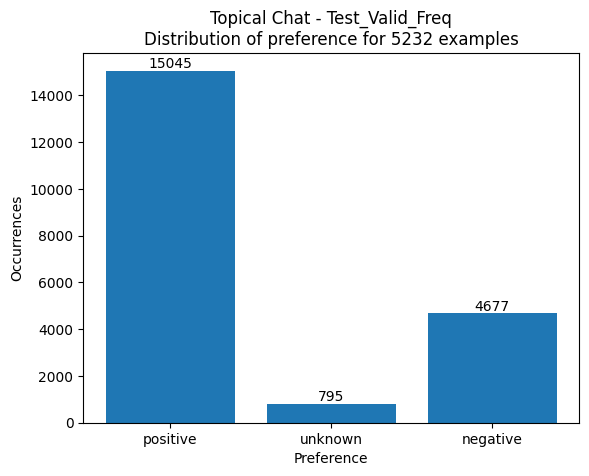

In [82]:
analysis = pnn_analysis(ds_tc_valid)

fig, ax = plt.subplots()
bars = ax.bar(range(len(analysis[0].keys())), analysis[0].values())
ax.bar_label(bars)
ax.set_xticks(range(0, len(analysis[0].keys()), 1))
ax.set_xticklabels(analysis[0].keys())
plt.title(f"Topical Chat - Test_Valid_Freq\nDistribution of preference for {analysis[1]} examples")
plt.xlabel("Preference")
plt.ylabel("Occurrences")
plt.show()

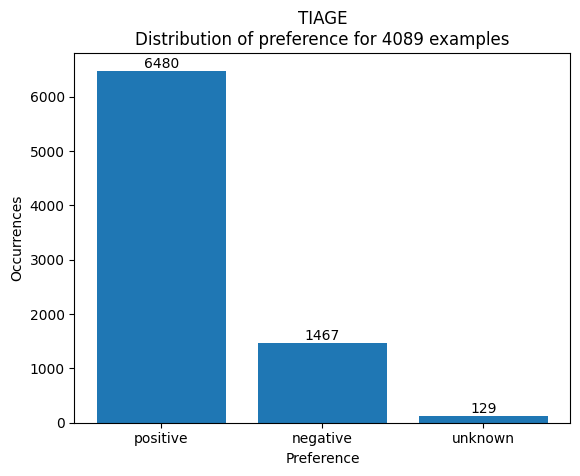

In [84]:
analysis = pnn_analysis(ds_tiage)

fig, ax = plt.subplots()
bars = ax.bar(range(len(analysis[0].keys())), analysis[0].values())
ax.bar_label(bars)
ax.set_xticks(range(0, len(analysis[0].keys()), 1))
ax.set_xticklabels(analysis[0].keys())
plt.title(f"TIAGE\nDistribution of preference for {analysis[1]} examples")
plt.xlabel("Preference")
plt.ylabel("Occurrences")
plt.show()

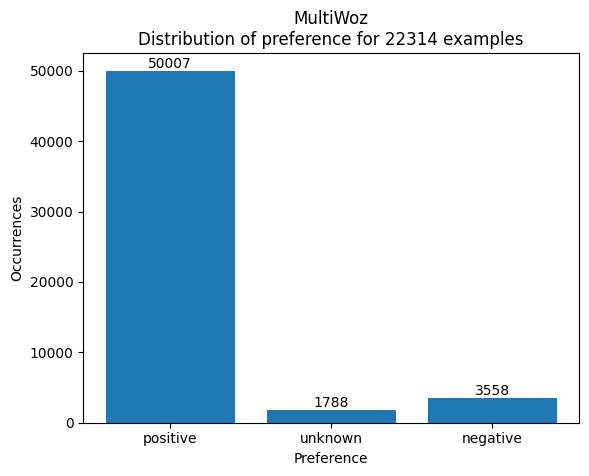

In [85]:
analysis = pnn_analysis(ds_multiwoz)

fig, ax = plt.subplots()
bars = ax.bar(range(len(analysis[0].keys())), analysis[0].values())
ax.bar_label(bars)
ax.set_xticks(range(0, len(analysis[0].keys()), 1))
ax.set_xticklabels(analysis[0].keys())
plt.title(f"MultiWoz\nDistribution of preference for {analysis[1]} examples")
plt.xlabel("Preference")
plt.ylabel("Occurrences")
plt.show()